In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [22]:
df = pd.read_csv('googleplaystore.csv')

print("DataFrame original:")
print(df.head())


DataFrame original:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  A

In [23]:
df_cleaned = df.drop_duplicates()

print("\nDataFrame após remoção de duplicatas:")
print(df_cleaned.head())


DataFrame após remoção de duplicatas:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018         

In [24]:
if 'Installs' in df_cleaned.columns:
    df_cleaned['Installs'] = df_cleaned['Installs'].astype(str)
    df_cleaned['Installs'] = df_cleaned['Installs'].str.replace(',', '').str.replace('+', '').str.replace('"', '')

    # Remover linhas com valores não numéricos na coluna 'Installs'
    df_cleaned = df_cleaned[df_cleaned['Installs'].apply(lambda x: x.isnumeric())]

    # Converter a coluna 'Installs' para numérica
    df_cleaned['Installs'] = df_cleaned['Installs'].astype(int)
else:
    print("A coluna 'Installs' não foi encontrada no DataFrame.")

C:\Users\santh\AppData\Local\Temp\ipykernel_14620\2441702475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Installs'] = df_cleaned['Installs'].astype(str)
C:\Users\santh\AppData\Local\Temp\ipykernel_14620\2441702475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Installs'] = df_cleaned['Installs'].str.replace(',', '').str.replace('+', '').str.replace('"', '')


In [25]:
# Seleciona os 5 aplicativos com maior número de instalações
top_5_apps = df_cleaned.nlargest(5,'Installs')[['App', 'Installs']]
print(top_5_apps)

# Função para formatar os valores do gráfico para que fiquem de forma mais legível
def billions(x,pos):
    return '%1.1fB' % (x * 1e-9)

formatter = FuncFormatter(billions)


                                          App    Installs
152                         Google Play Books  1000000000
335  Messenger – Text and Video Chat for Free  1000000000
336                        WhatsApp Messenger  1000000000
338              Google Chrome: Fast & Secure  1000000000
340                                     Gmail  1000000000


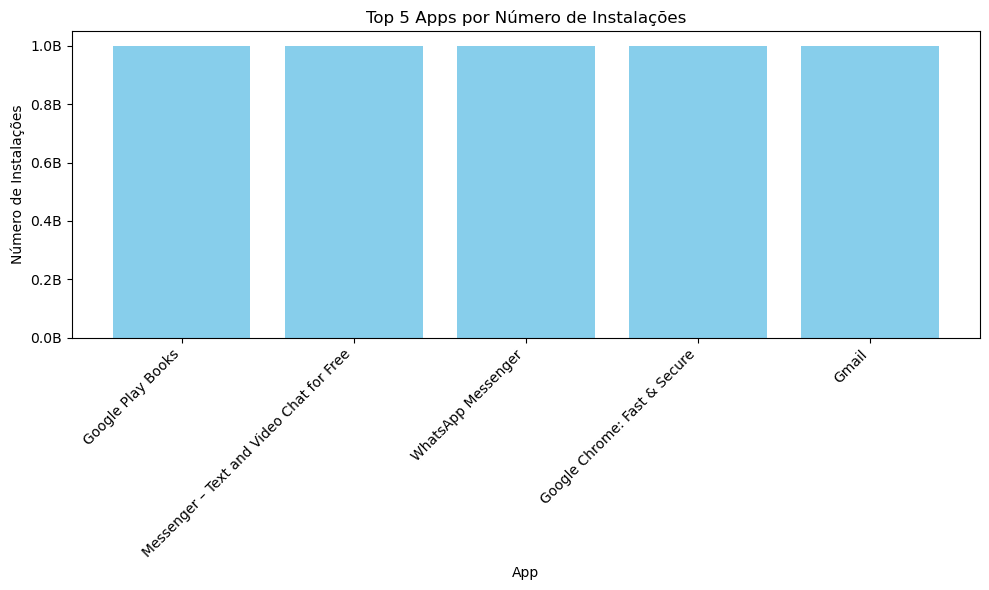

In [26]:
# Montando o gráfico dos 5 aplicativos com maior número de instalações
plt.figure(figsize=(10, 6))
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='skyblue')
plt.title('Top 5 Apps por Número de Instalações')
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()


In [27]:
# Conta as categorias dos aplicativos

category_counts = df_cleaned['Category'].value_counts()

# Agrupar pequenas categorias em 'Outros'

threshold = 0.01 * category_counts.sum()
category_counts_grouped = category_counts[category_counts >= threshold]
category_counts_grouped['Outros'] = category_counts[category_counts < threshold].sum()

# Preparar os dados para o gráfico de pizza

labels = category_counts_grouped.index
sizes = category_counts_grouped.values
explode = [0.1 if label == 'Outros' else 0 for label in labels]

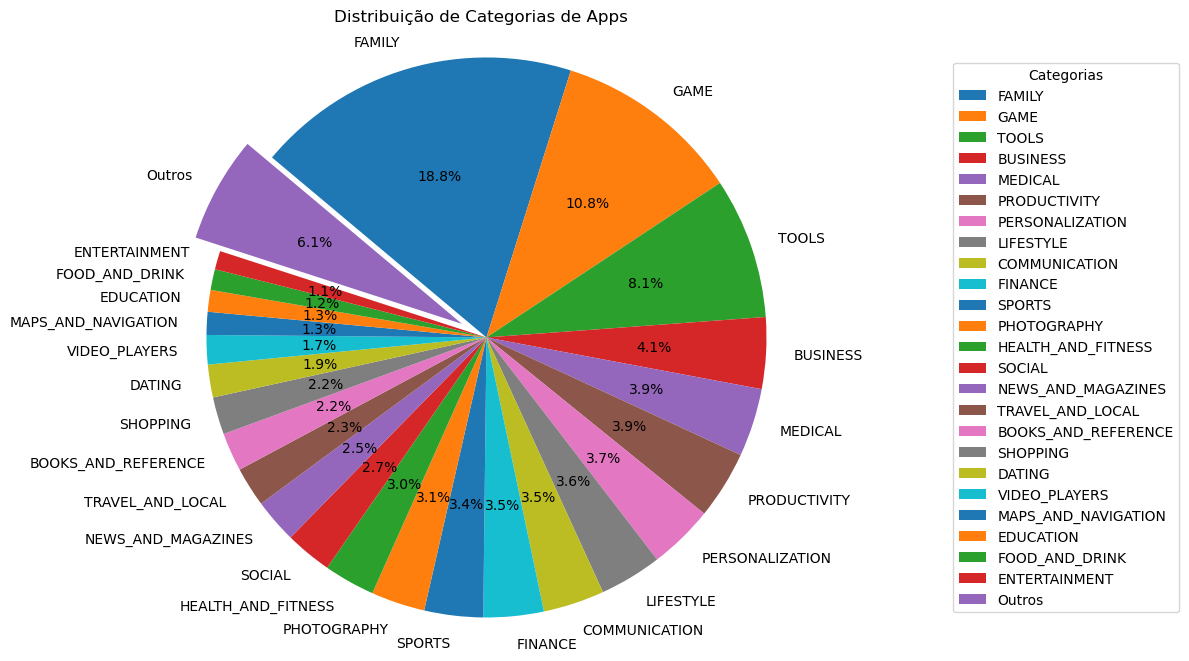

In [28]:
# Cria o gráfico de pizza referente as categorias do apps

plt.figure(figsize=(12, 8))
plt.pie(sizes,labels=labels , autopct='%1.1f%%', startangle=140, counterclock=False, explode=explode)
plt.title('Distribuição de Categorias de Apps')
plt.axis('equal')
plt.legend(labels, title="Categorias", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))  
plt.show()

In [29]:
# Mostra qual o aplicativo mais caro no Dataset

df_cleaned['Price'] = df_cleaned['Price'].str.replace('$', '').astype(float)
most_expensive_app = df_cleaned.loc[df_cleaned['Price'].idxmax()]

print("Aplicativo mais caro:")
print(f"App: {most_expensive_app['App']}")
print(f"Price: ${most_expensive_app['Price']}")

Aplicativo mais caro:
App: I'm Rich - Trump Edition
Price: $400.0


In [30]:
mature_apps = df_cleaned[df_cleaned['Content Rating']== 'Mature 17+']

num_mature_apps = mature_apps.shape[0]

print(f"Total de aplicativos classificados como 'Mature17+': {num_mature_apps}")

Total de aplicativos classificados como 'Mature17+': 447


In [34]:
df_cleaned = df.drop_duplicates()

if 'Reviews' in df_cleaned.columns:
    df_cleaned = df_cleaned[df_cleaned['Reviews'].apply(lambda x: x.isnumeric())]
    df_cleaned['Reviews'] = df_cleaned['Reviews'].astype(int)
else:
    print("A coluna 'Reviews' não foi encontrada no DataFrame.")

top_10_reviews = df_cleaned.nlargest(10, 'Reviews')[['App', 'Reviews']]

top_10_reviews = top_10_reviews.sort_values(by='Reviews', ascending=False)

print("Top 10 aplicativos por número de reviews:")
print(top_10_reviews)

Top 10 aplicativos por número de reviews:
                                           App   Reviews
2544                                  Facebook  78158306
3943                                  Facebook  78128208
336                         WhatsApp Messenger  69119316
3904                        WhatsApp Messenger  69109672
2604                                 Instagram  66577446
2545                                 Instagram  66577313
3909                                 Instagram  66509917
382   Messenger – Text and Video Chat for Free  56646578
335   Messenger – Text and Video Chat for Free  56642847
1879                            Clash of Clans  44893888


In [35]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return None
    

df_cleaned['Size'] = df_cleaned['Size'].apply(convert_size)
df_cleaned = df_cleaned.dropna(subset=['Size'])

top_10_size = df_cleaned.nlargest(10, 'Size')[['App', 'Size']]

print(f"Top 10 aplicativos por tamanho:")
print(top_10_size)

Top 10 aplicativos por tamanho:
                                    App   Size
1080                          Post Bank  100.0
1565     Talking Babsy Baby: Baby Games  100.0
1758             Hungry Shark Evolution  100.0
1793  Mini Golf King - Multiplayer Game  100.0
1988             Hungry Shark Evolution  100.0
2299               Navi Radiography Pro  100.0
3973             Hungry Shark Evolution  100.0
4690                         Vi Trainer  100.0
5427                    Ultimate Tennis  100.0
5530        The Walking Dead: Our World  100.0


In [36]:
paid_apps = df_cleaned[df_cleaned['Type'] == 'Paid']

total_paid_apps = paid_apps.shape[0]

print(f"Total de aplicativos pagos: {total_paid_apps}")

Total de aplicativos pagos: 691


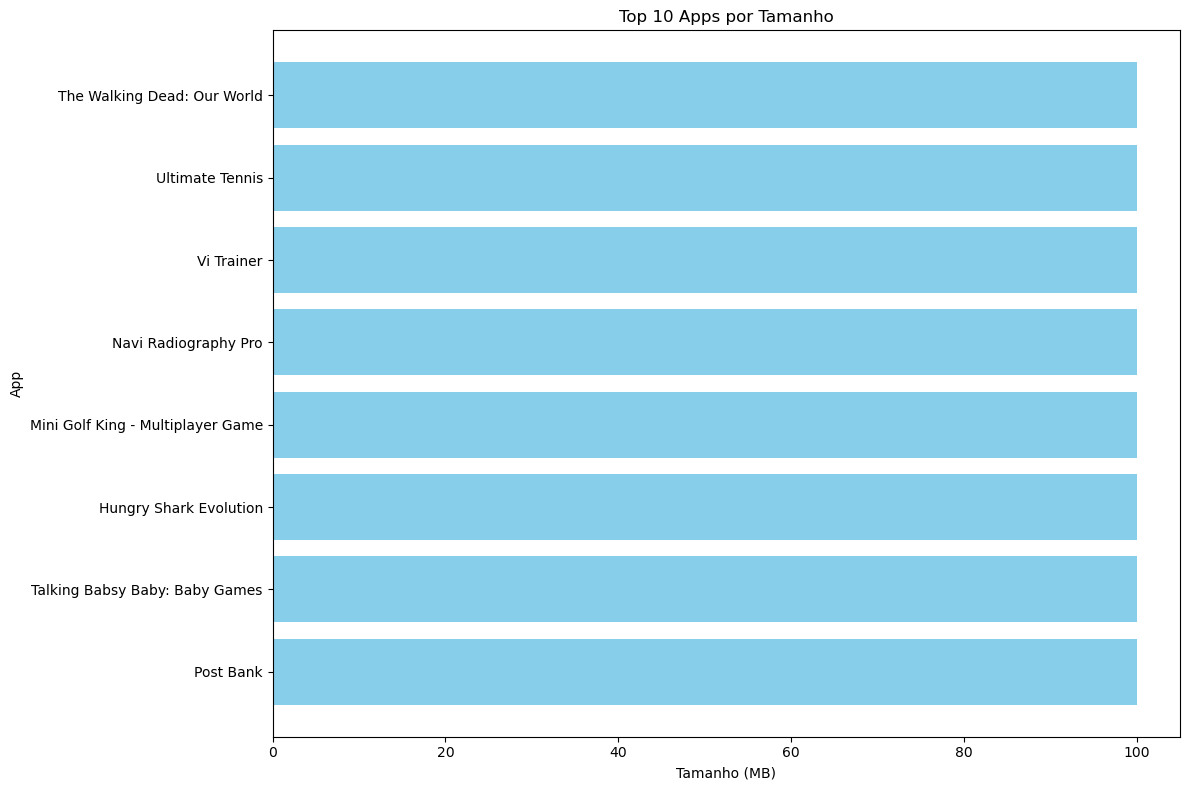

In [55]:
# Gráfico de linha para o top 10 Apps por tamanho

top_10_size = df_cleaned.nlargest(10, 'Size')[['App', 'Size']]

plt.figure(figsize=(12, 8))
plt.barh(top_10_size['App'], top_10_size['Size'], color='skyblue')
plt.title('Top 10 Apps por Tamanho')
plt.xlabel('Tamanho (MB)')
plt.ylabel('App')
plt.tight_layout()
plt.show()

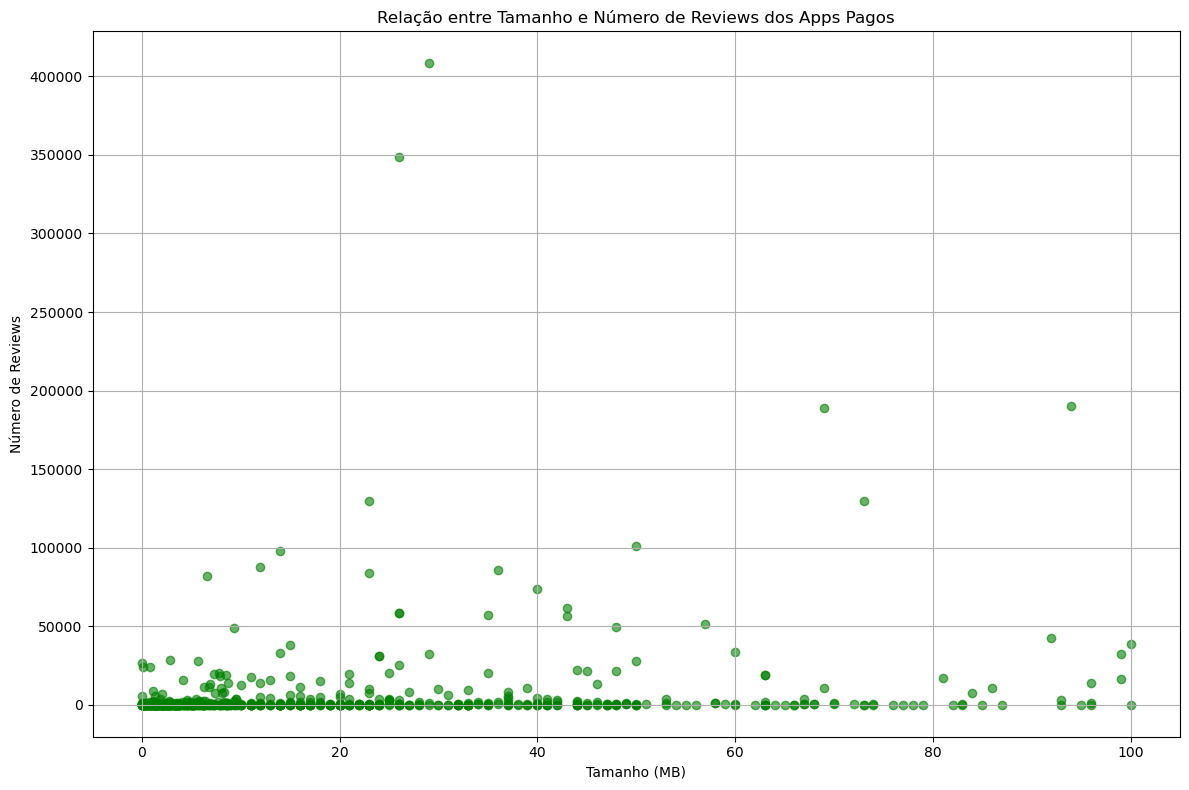

In [42]:
# Gráfico de Dispersão para a Relação entre o Tamanho e o Número de Reviews dos Apps Pagos

plt.figure(figsize=(12, 8))
plt.scatter(paid_apps['Size'], paid_apps['Reviews'], alpha=0.6, color='g')
plt.title('Relação entre Tamanho e Número de Reviews dos Apps Pagos')
plt.xlabel('Tamanho (MB)')
plt.ylabel('Número de Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()